
# Advanced Machine Learning (Lab 08)

### Import Libraries

In [69]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version

import warnings
warnings.filterwarnings("ignore")

## Task 1

In [70]:
N = 200
np.random.seed(1)
X = np.concatenate(
    (np.random.normal(5, 1, int(0.9 * N)), np.random.normal(10, 1, int(0.1 * N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = 0.9 * norm(5, 1).pdf(X_plot[:, 0]) + 0.1 * norm(10, 1).pdf(X_plot[:, 0])

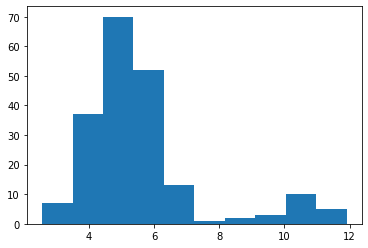

In [72]:
plt.hist(X)
plt.show()

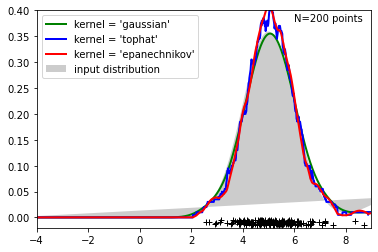

In [73]:
fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="input distribution")
colors = ["green", "blue", "red"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

## Task 2

In [84]:
df = pd.read_csv('earthquake.txt', sep = ' ')
df.head()

,popn,body,surface
0,equake,5.60,4.25
1,equake,5.18,3.93
2,equake,6.31,6.30
3,equake,5.36,4.49
4,equake,5.96,6.39


In [85]:
body = df.iloc[:, 1:2]
body.shape

(29, 1)

In [86]:
f1 = df[df['popn']=='equake']
f2 = df[df['popn']=='explosn']

In [87]:
f1 = f1.iloc[:, 1:2]
f2 = f2.iloc[:, 1:2]

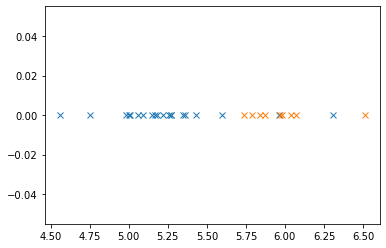

In [91]:
plt.plot(f1, np.zeros_like(f1), 'x')
plt.plot(f2, np.zeros_like(f2), 'x')
plt.show()

In [92]:
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(f1)
kde_score1 = kde.score_samples(f1)

In [93]:
kde2 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(f1)
kde_score2 = kde.score_samples(f2)

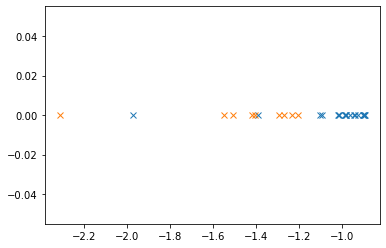

In [94]:
plt.plot(kde_score1, np.zeros_like(kde_score1), 'x')
plt.plot(kde_score2, np.zeros_like(kde_score2), 'x')
plt.show()